밑바닥부터 시작하는 딥러닝 2
# 2.1 자연어 처리란

-> 우리의 말을 컴퓨터에게 이해시키기 위한 기술

In [1]:
# 단어의 의미 이해시키기

## 시소러스

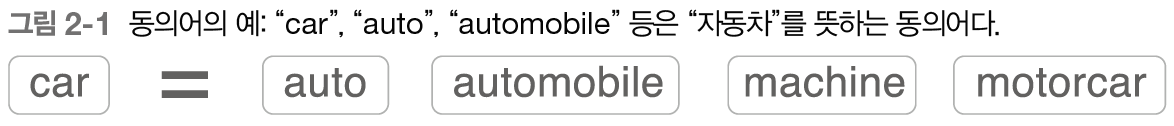

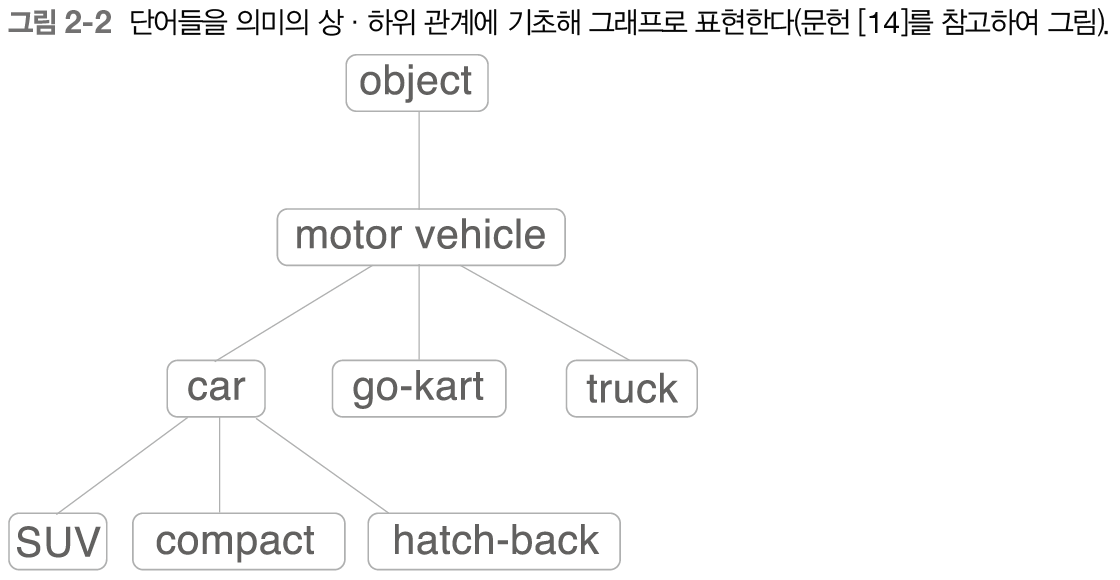

가장 유명한 시소러스: WordNet

* 유의어, 단어 네트워크 이용-> 단어 사이의 유사도 구할 수 있음
* 문제점: 시대 변화에 대응하기 어렵고 단어의 미묘한 차이는 표현하기 어려운 큰 문제점이 있어 잘 사용하지 않음

## 통계 기반 기법

말뭉치(corpus): 대량의 텍스트 데이터 - 각 품사가 레이블되있는 등 자연어 처리를 염두해두고 수집

### 파이썬으로 말뭉치 전처리하기

In [2]:
text = "You say goodbye and I say hello."

In [3]:
text = text.lower() # 소문자로 변환 - 문장 첫 번째의 단어도 소문자 단어와 똑같은 취급 위해
text = text.replace('.', ' .') # . 를 띄고 . 으로
text

'you say goodbye and i say hello .'

In [4]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [5]:
word_to_id = {} # 단어에서 단어 id로 변환
id_to_word = {} # 단어 id에서 단어로 변환

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

* word_to_id에 없으면 새로운 id와 단어 추가

In [6]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [7]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [8]:
id_to_word[1]

'say'

In [9]:
word_to_id['hello']

5

In [10]:
# 단어 목록을 단어 ID 목록으로 
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [11]:
def preprocess(text):
    text.lower()
    text.replace('.', ' .')
    words = text.split(' ')
    
    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
            
    corpus = np.array([word_to_id[w] for w in words])
    
    return corpus, word_to_id, id_to_word

In [12]:
text = 'You say goodbye and I say hello.'

In [13]:
corpus, word_to_id, id_to_word = preprocess(text)

In [14]:
corpus # 단어 id목록

array([0, 1, 2, 3, 4, 1, 5])

In [15]:
word_to_id # 단어에서 단어 id 딕셔너리

{'You': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'I': 4, 'hello.': 5}

In [16]:
id_to_word # 단어 id에서 단어 딕셔너리

{0: 'You', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'I', 5: 'hello.'}

### 단어의 분산 표현

= 단어의 벡터화

ex) 3차원 분산 표현: [0.21, -0.45, 0.83] <- 단어를 고정 길이의 밀집벡터로 표현

### 분포 가설

단어의 의미는 주변 단어에 의해 형성된다

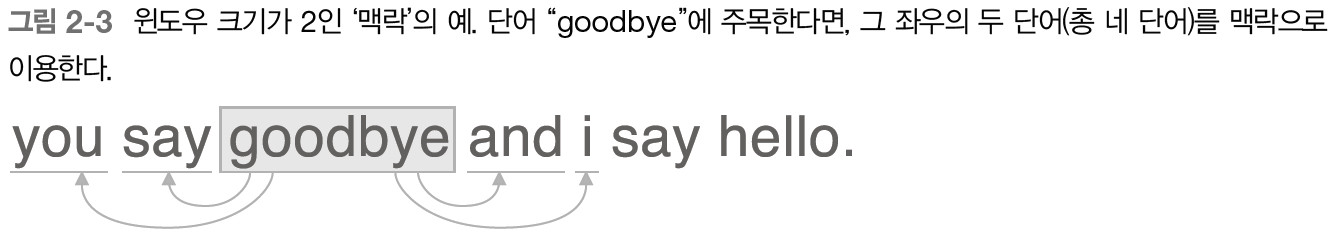

윈도우 크기: 맥락의 크기(주변 단어를 몇 개나 포함할지)

### 동시발생 행렬

In [17]:
import sys
sys.path.append('/Users/sungahwang/Desktop/DL/DLfromScratch2')
from common.util import preprocess

In [18]:
text = "You say goodbye and I say hello."

In [19]:
corpus, word_to_id, id_to_word = preprocess(text)

In [20]:
print(corpus)

[0 1 2 3 4 1 5 6]


In [21]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


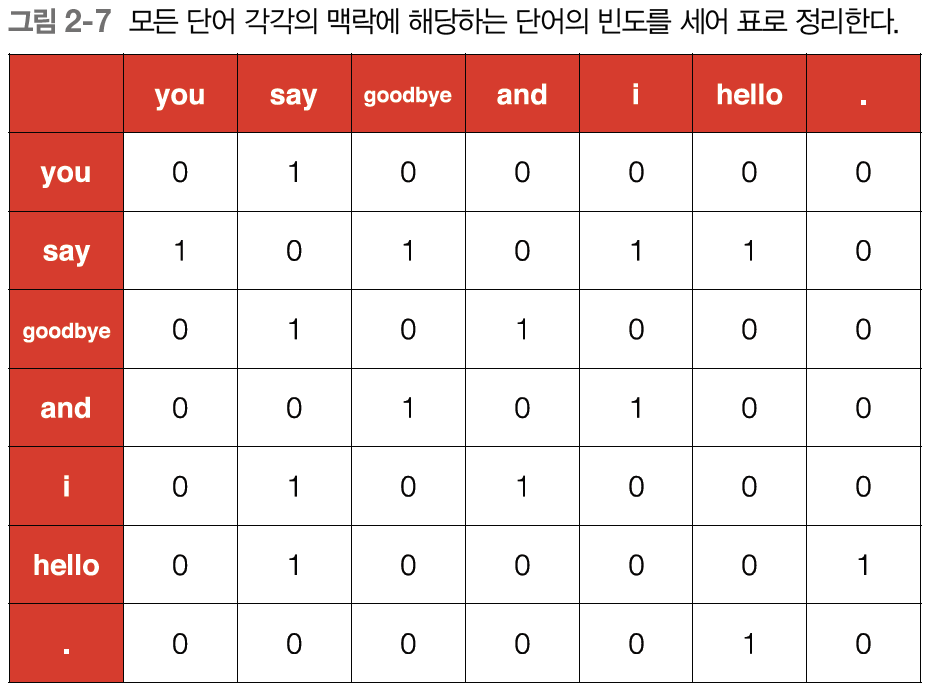

* 동시발생 행렬

In [22]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
], dtype = np.int32)

In [23]:
print(C[0]) #ID가 0인 단어의 벡터 표현

[0 1 0 0 0 0 0]


In [24]:
print(C[4]) #ID가 4인 단어의 벡터 표현

[0 0 0 0 0 1 0]


In [25]:
print(C[word_to_id['goodbye']]) # goodbye 의 벡터 표현

[0 1 0 1 0 0 0]


In [26]:
def create_co_matrix(corpus, vocab_size, window_size = 1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32) # 0으로 채워진 2차원 배열로 초기화
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i # 경계
            right_idx = idx + 1 # 경계
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
                
            if right_idx < corpus_size :
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
            
            return co_matix

* 말뭉치로부터 동시발생 행렬을 만들어주는 함수